# Data Visualization
Tristan Moser - Evaluating the Effect of Teacher Salary on Student Performance

This notebook outlines my evaluation of the data that I have collected and cleaned. I am looking at the characteristics of the population I am dealing with and trying to determine how to best work with it. This will include some simple visualizaions, outlier removal, and a little feature engineering.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [9]:
#Read in the data
tot = pd.read_csv('Total_Data.csv')

#this includes one less year, but includes data on AP class enrollment
ap = pd.read_csv('Total_Data_AP.csv')

In [175]:
#Remind myself what columns I am working with
tot.describe()

,Organization Code,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latino,White,Native Hawaiian or Other Pacific Islander,Two or More Races,Percent Minority,Year,...,T_Pac_M,T_Pac_T,T_Two_F,T_Two_M,T_Two_T,T_Whi_F,T_Whi_M,T_Whi_T,Total FTE,Average Salary
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,...,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,1917.348655,35.983184,153.414798,230.906951,1625.702915,2674.567265,11.798206,190.200673,0.273800,14.985426,...,12.252242,51.108744,2.069507,0.718610,2.788117,159.086323,50.701794,209.788117,283.453442,41350.130000
std,1592.351974,95.823261,570.564122,1175.841023,4928.007975,7230.150942,36.255882,557.883083,0.237075,1.418497,...,72.232899,301.534892,10.631027,3.745311,14.292164,453.644499,144.874119,598.104740,738.298971,7324.857869
min,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,18103.610000
25%,950.000000,1.000000,0.000000,1.000000,34.000000,168.750000,0.000000,3.000000,0.100600,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,13.000000,20.530000,36713.890000
50%,1585.000000,5.000000,3.000000,4.500000,157.500000,357.000000,1.000000,11.000000,0.217950,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,7.000000,29.000000,41.035000,40073.390000
75%,2700.000000,20.000000,19.000000,18.000000,774.250000,1413.750000,3.000000,51.250000,0.402925,16.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,66.250000,23.000000,90.250000,140.525000,45683.015000
max,9170.000000,753.000000,4955.000000,12235.000000,50725.000000,58115.000000,296.000000,3841.000000,0.967000,17.000000,...,1076.000000,4379.000000,141.000000,53.000000,194.000000,3565.000000,1172.000000,4729.000000,6109.710000,75220.000000


In [176]:
ap.describe()

,Organization Code,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latino,White,Native Hawaiian or Other Pacific Islander,Two or More Races,Percent Minority,Year,...,ap_American Indian or Alaska Native Count,ap_Asian Count,ap_Black or African American Count,ap_Hispanic or Latino Count,ap_White Count,ap_Native Hawaiian or Other Pacific Islander Count,ap_Two Or More Races Count,ap_Male Count,ap_Female Count,ap_Total Student Count
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,...,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,1731.457431,36.790765,156.056277,237.288600,1655.861472,2730.712843,11.933622,192.137085,0.253805,14.744589,...,1.767677,29.021645,14.942280,78.002886,298.344877,0.920635,17.607504,197.901876,242.705628,440.607504
std,1132.985325,96.767111,572.144711,1201.556208,5004.631617,7330.452317,36.230934,557.487085,0.238763,0.827448,...,6.294276,147.358979,93.161009,319.024715,1081.254962,3.627654,67.794351,709.813581,875.280759,1584.494642
min,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.009400,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,940.000000,1.000000,0.000000,1.000000,33.000000,169.000000,0.000000,3.000000,0.010000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1560.000000,5.000000,3.000000,4.000000,164.000000,358.000000,1.000000,11.000000,0.192300,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2660.000000,19.000000,19.000000,19.000000,768.000000,1465.000000,3.000000,48.000000,0.360000,15.000000,...,0.000000,0.000000,0.000000,12.000000,55.000000,0.000000,2.000000,36.000000,50.000000,89.000000
max,9000.000000,741.000000,4702.000000,12235.000000,50725.000000,58115.000000,289.000000,3631.000000,0.931000,16.000000,...,58.000000,1669.000000,925.000000,3675.000000,9272.000000,40.000000,632.000000,5441.000000,6762.000000,12203.000000


With the data ready, I want to plot it to get an idea of what the overall trends are. But first, I need to see what kinds of plots are realistic. To do this, I check how many unique Districts the dataset has.

In [11]:
len(tot['Orgnazation Name'].unique())

189

Because there are so many unique Districts, it does not make sense to get a distribution for each characteristic in each District. Instead, I can do some simple comparisons across Districts for one variable, but other trends will have to be evaluated across all Colorado Districts as a whole.

### Teacher Salary and Graduation Rates

I begin with looking at Teaher Salaries as that is at the heart of my analysis.

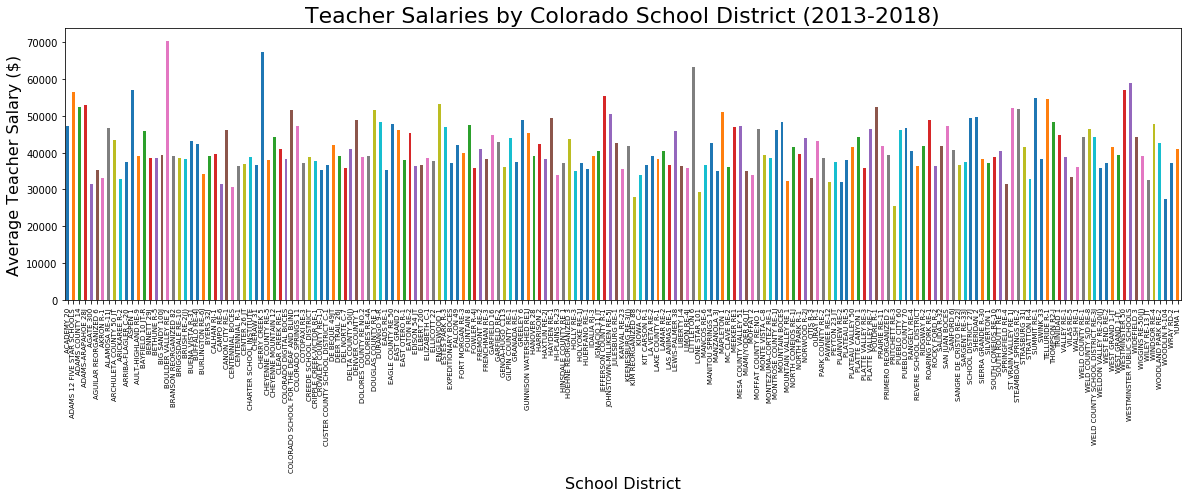

In [18]:
tot.groupby('Orgnazation Name')['Average Salary'].mean().plot(kind='bar',figsize=(20,5))
plt.title('Teacher Salaries by Colorado School District (2013-2018)',fontsize=22)
plt.ylabel('Average Teacher Salary ($)',fontsize=16)
plt.xlabel('School District',fontsize=16)
plt.tick_params(axis='x', labelsize=7)

The bar plot above gives valuable information. First, it shows that there is a good amount of variation among the teacher salaries. This will help provide some precision to the future statistical analysis of the effect of teacher salaries on other characteristics.

There is evidence, however, that there are some outliers in the data. There are some Districts with very high salaries (and some with very low ones). It is hard to determine with this graph exactly where to draw the line as to what constitutes an outlier. To do this, I look at a boxplot of the distribution.

Text(0,0.5,'Percentage')

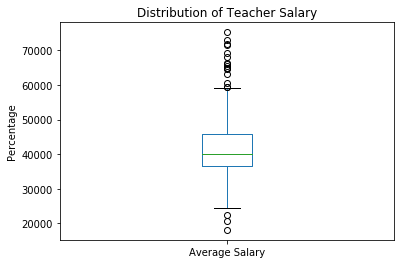

In [135]:
tot['Average Salary'].plot(kind='box')
plt.title('Distribution of Teacher Salary')
plt.ylabel('Percentage')

This boxplot confirms my suspicion and it looks like any salary above ~60,000 or below ~24,000 is an outlier. Before removing any outlier, I want to see how that would impact my main target variable: Graduation rates as well as Completion Rates.

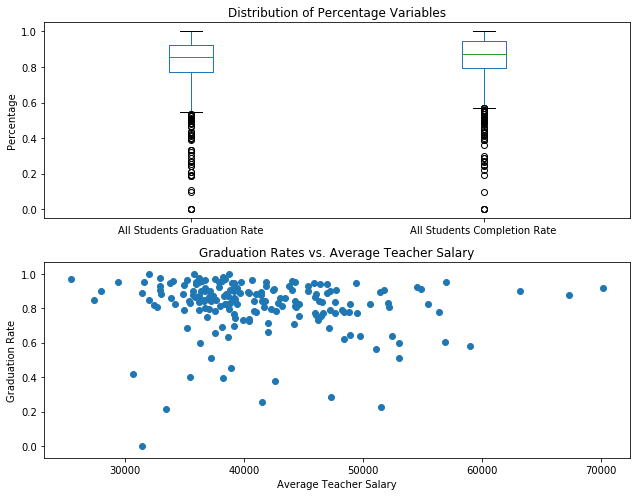

In [162]:
f, ax = plt.subplots(2, sharex=False,figsize=(9,7))
tot[['All Students Graduation Rate','All Students Completion Rate']].plot(kind='box',ax=ax[0])
ax[0].set_title('Distribution of Percentage Variables')
ax[0].set_ylabel('Percentage')
ax[1].scatter(x=tot.groupby('Orgnazation Name')['Average Salary'].mean(),y=tot.groupby('Orgnazation Name')['All Students Graduation Rate'].mean())
ax[1].set_title('Graduation Rates vs. Average Teacher Salary')
ax[1].set_ylabel('Graduation Rate')
ax[1].set_xlabel('Average Teacher Salary')
plt.tight_layout()

The previous plots suggest that the Salary outliers should be removed, but there are even more compelling outliers to remove in the Graduation Rate. For my analysis, I want to see the effect of Salary on Grad rates, but I want it to be reasonable. A district with a graduation rate below 50% likely has some other unique characteristics (online district, troubled youth district, etc.) that it would be hard to capture given the data. So, I will limit my data to districts with a graduation rate of at least 60%.

In [151]:
tot_1 = tot[(tot['Average Salary']>24000) & (tot['Average Salary']<60000)]
tot_1 = tot_1[tot_1['All Students Graduation Rate']>.6]

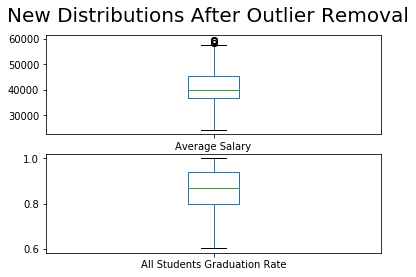

In [160]:
fig, ax = plt.subplots(2,sharex=False)
fig.suptitle('New Distributions After Outlier Removal',fontsize=20)
tot_1['Average Salary'].plot(kind='box',ax=ax[0])
tot_1['All Students Graduation Rate'].plot(kind='box',ax=ax[1])

Now that outliers have been removed, I will look at a simple scatter plot to determine any obvious relationship between salary and grad rate.

Text(0,0.5,'Graduation Rate')

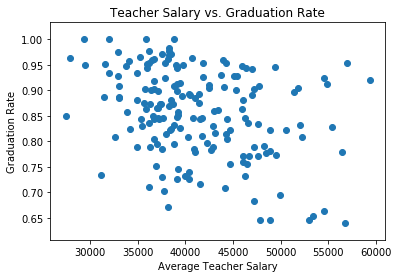

In [174]:
plt.scatter(x=tot_1.groupby('Orgnazation Name')['Average Salary'].mean(),y=tot_1.groupby('Orgnazation Name')['All Students Graduation Rate'].mean())
plt.title('Teacher Salary vs. Graduation Rate')
plt.xlabel('Average Teacher Salary')
plt.ylabel('Graduation Rate')

There does not appear to be a clear relationship here to identify the effect of Teacher Salary on Graduation rates.

### Other Factors: AP Enrollment and Student to Teacher Ratios
Another area of interest would be to determine if Teacher Salary has any effect on the amount of students that enroll in AP classes. This may be relevant if teachers with higher salary are more effective such that students are more capable of taking AP classes.

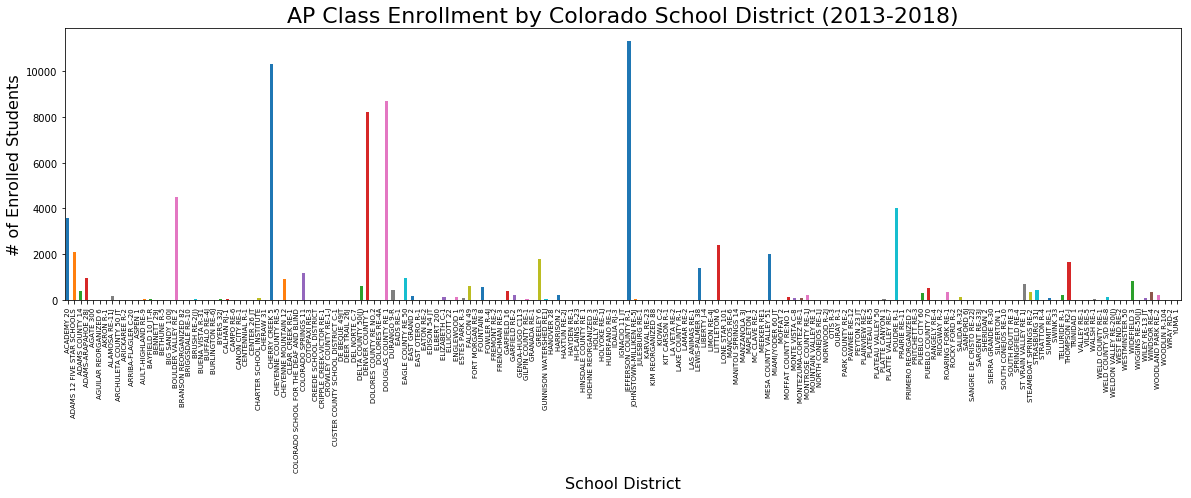

In [80]:
ap.groupby('Orgnazation Name')['ap_Total Student Count'].mean().plot(kind='bar',figsize=(20,5))
plt.title('AP Class Enrollment by Colorado School District (2013-2018)',fontsize=22)
plt.ylabel('# of Enrolled Students',fontsize=16)
plt.xlabel('School District',fontsize=16)
plt.tick_params(axis='x', labelsize=7)

The previous figure shows that there is a great contrast in the number of students enrolled in AP classes among the districts. This suggests that it is not a good measure since there are a considerable amount of districts without any students enrolled in such classes.

To still make use of the information, I create a new variable 'ap' that will represent whether a district has any students enrolled in an AP class or not. While this is not a perfect measure, it simplifies the contrast present.

In [130]:
ap['ap'] = 'No'
for ii in range(len(ap)):
    if ap['ap_Total Student Count'][ii] > 0 :
        ap['ap'][ii] = 'Yes'

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [131]:
ap['ap'].describe()

count     693
unique      2
top        No
freq      389
Name: ap, dtype: object

Text(0,0.5,'AP Enrollment?')

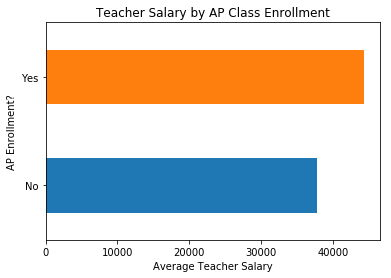

In [192]:
ap.groupby('ap')['Average Salary'].mean().plot(kind='barh',title='Teacher Salary by AP Class Enrollment')
plt.xlabel('Average Teacher Salary')
plt.ylabel('AP Enrollment?')

There does appear to be a relationship between teacher salary and AP class enrollment. It is not clear from the figure, however, which is causing the other. Still, the positive relationship you would expect is present.

Next, I look at the Student to Teacher Ratio since, like teacher salary, has been another factor that many believe has an impact on student behavior and success.

Text(0.5,0,'Student to Teacher Ratio')

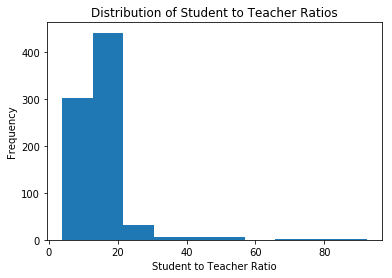

In [187]:
tot_1['Pupil/Teacher Ratio'].plot(kind='hist')
plt.title('Distribution of Student to Teacher Ratios')
plt.xlabel('Student to Teacher Ratio')

In [203]:
tot_2 = tot_1[tot_1['Pupil/Teacher Ratio']<40]

This figure suggests that there is not much diversity when it comes to student/teacher ratios.

Text(0.5,0,'Student to Teacher Ratio')

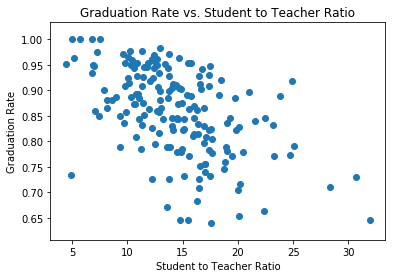

In [225]:
plt.scatter(y=tot_2.groupby('Orgnazation Name')['All Students Graduation Rate'].mean(),x=tot_2.groupby('Orgnazation Name')['Pupil/Teacher Ratio'].mean())
plt.title('Graduation Rate vs. Student to Teacher Ratio')
plt.ylabel('Graduation Rate')
plt.xlabel('Student to Teacher Ratio')

This figure depicts a clear, negative relationship between graduation rates and student to teacher ratios. It shows that districts that give more attention to students individually tend to have higher graduation rates.

Now that we see this relationship, it is compelling to ask how student to teacher ratios relate to teacher salaries to see if there is an indirect relationship we can visualize.

Text(0,0.5,'Student to Teacher Ratio')

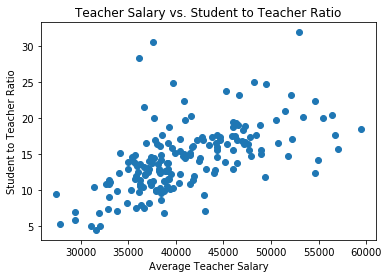

In [208]:
plt.scatter(x=tot_2.groupby('Orgnazation Name')['Average Salary'].mean(),y=tot_2.groupby('Orgnazation Name')['Pupil/Teacher Ratio'].mean())
plt.title('Teacher Salary vs. Student to Teacher Ratio')
plt.xlabel('Average Teacher Salary')
plt.ylabel('Student to Teacher Ratio')

There is an interesting, positive relationship that appears here between teacher salary and student/teacher ratios. This would suggest that teachers are paid more when they need to teach more students. Perhaps this is because those districts have a high amount of students or a low number of teachers. The following figures explore these possibilities.

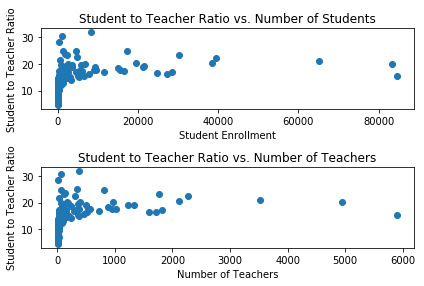

In [222]:
fig, ax = plt.subplots(2,sharex=False)
ax[0].set_title('Student to Teacher Ratio vs. Number of Students')
ax[0].set_xlabel('Student Enrollment')
ax[0].set_ylabel('Student to Teacher Ratio')
ax[0].scatter(x=tot_2.groupby('Orgnazation Name')['K-12 COUNT'].mean(),y=tot_2.groupby('Orgnazation Name')['Pupil/Teacher Ratio'].mean())

ax[1].set_title('Student to Teacher Ratio vs. Number of Teachers')
ax[1].set_xlabel('Number of Teachers')
ax[1].set_ylabel('Student to Teacher Ratio')
ax[1].scatter(x=tot_2.groupby('Orgnazation Name')['T_Total_Count'].mean(),y=tot_2.groupby('Orgnazation Name')['Pupil/Teacher Ratio'].mean())
plt.tight_layout()


Neither of those theories seem to hold true based on the data. Higher student populations do not seem to be a strong causer of high student to teacher ratios. It could be that the salary is higher for more qualified teachers and districts want to give a greater number of students access to those highly qualified teachers.

It seems interesting, however, that districts that pay more in teacher salary (maybe due to higher qualified teachers) tend not to yield higher graduation rates, yet those that pay a lower salary and have a lower teacher to student ratio seem to have higher rates.

### Socioeconomic visualization
While the insights up to this point have been informative and interesting, they do not paint the whole picture. To further understand what data I am dealing with, I need to look at some other socioeconomic factors of the districts that may add more information.

One aspect of interest for this study would be account for how poor a District is. The Colorado State Board of Education does not list the average income of a given District, so I settle for another measure: the % of students that qualify for free or reduced lunch. I use this measure since to qualify for the free or reduced lunch, your family income must be below a certain threshold. Thus, it approximates the wealth level of the district.

In [44]:
tot['T_Total_Count'] = tot['T_Total_Count'].replace({'\,':''},regex=True).astype(int)
tot['T_Whi_T'] = tot['T_Whi_T'].replace({'\,':''},regex=True).astype(int)
tot['T_Whi_M'] = tot['T_Whi_M'].replace({'\,':''},regex=True).astype(int)
tot['T_Whi_F'] = tot['T_Whi_F'].replace({'\,':''},regex=True).astype(int)
tot['T_Pac_M'] = tot['T_Pac_M'].replace({'\,':''},regex=True).astype(int)
tot['T_Pac_F'] = tot['T_Pac_F'].replace({'\,':''},regex=True).astype(int)
tot['T_Pac_T'] = tot['T_Pac_T'].replace({'\,':''},regex=True).astype(int)

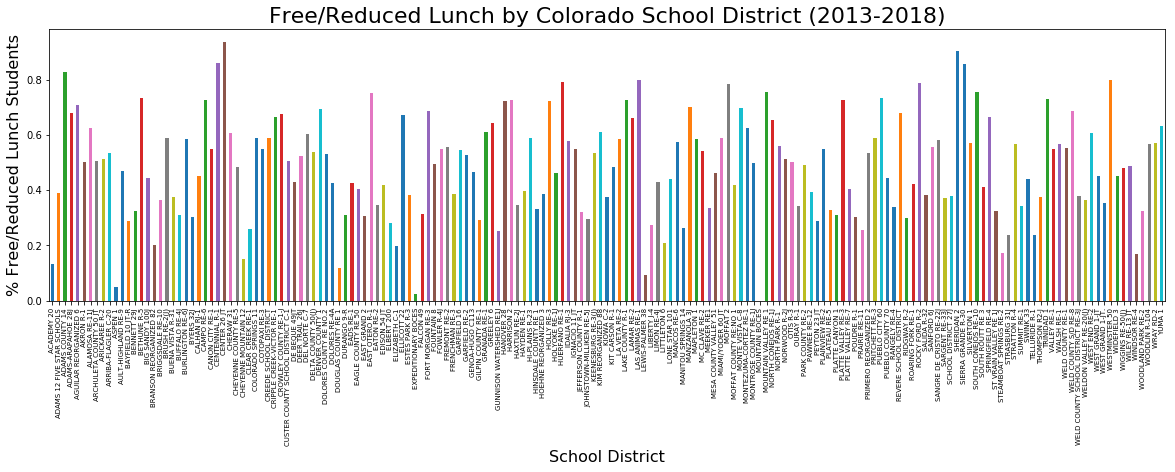

In [229]:
tot_2.groupby('Orgnazation Name')['% FREE AND REDUCED'].mean().plot(kind='bar',figsize=(20,5))
plt.title('Free/Reduced Lunch by Colorado School District (2013-2018)',fontsize=22)
plt.ylabel('% Free/Reduced Lunch Students',fontsize=16)
plt.xlabel('School District',fontsize=16)
plt.tick_params(axis='x', labelsize=7)

Again, it looks like there is a great variety of wealth level among the Colorado School Districts, but the following box plot suggests that there are no outliers to deal with.

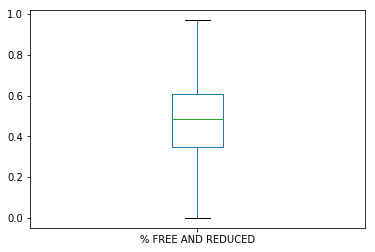

In [230]:
tot_2['% FREE AND REDUCED'].plot(kind='box')

The following figures look at the ethnic composition of students and teachers across the districts in Colorado. Both show that teachers and students are predominantly white with teachers being even less diverse than the students.

Text(0,0.5,'Ethnic Group')

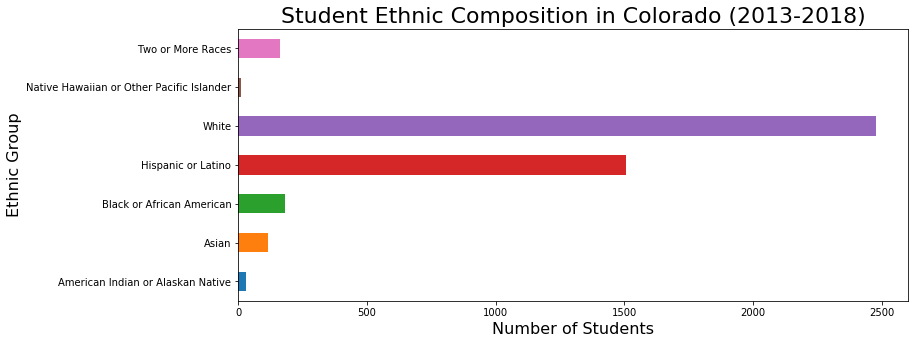

In [226]:
scomp_cols = ['American Indian or Alaskan Native','Asian','Black or African American', 'Hispanic or Latino',
              'White','Native Hawaiian or Other Pacific Islander', 'Two or More Races']
tot_2[scomp_cols].mean().plot(kind='barh',figsize=(12,5))
plt.title('Student Ethnic Composition in Colorado (2013-2018)',fontsize=22)
plt.xlabel('Number of Students',fontsize=16)
plt.ylabel('Ethnic Group',fontsize=16)

Text(0.5,0,'Ethnic Group')

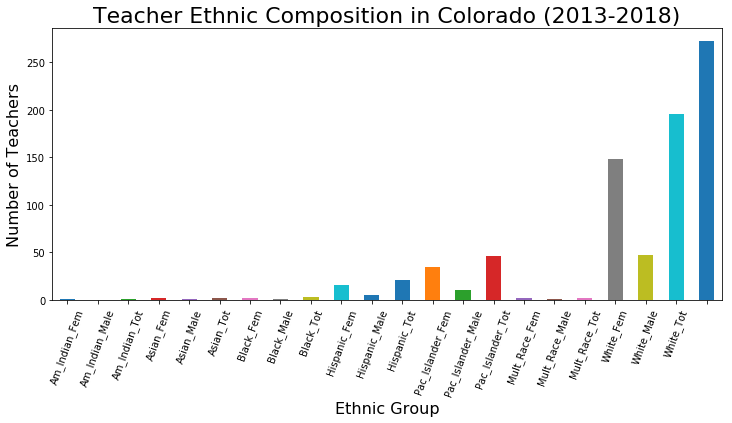

In [228]:
teacher_comp = [col for col in list(tot.columns) if 'T_' in col]
labels = ['Am_Indian_Fem','Am_Indian_Male','Am_Indian_Tot','Asian_Fem','Asian_Male','Asian_Tot',
          'Black_Fem','Black_Male','Black_Tot','Hispanic_Fem','Hispanic_Male','Hispanic_Tot',
          'Pac_Islander_Fem','Pac_Islander_Male','Pac_Islander_Tot',
          'Mult_Race_Fem','Mult_Race_Male','Mult_Race_Tot','White_Fem','White_Male','White_Tot']
tot_2[teacher_comp].mean().plot(kind='bar',figsize=(12,5)).set_xticklabels(labels,rotation=70)
plt.title('Teacher Ethnic Composition in Colorado (2013-2018)',fontsize=22)
plt.ylabel('Number of Teachers',fontsize=16)
plt.xlabel('Ethnic Group',fontsize=16)

In [236]:
tot_2['Teacher Minority'] = 0
tot_2 = tot_2.reset_index()
for ii in range(len(tot_2)):
    tot_2['Teacher Minority'][ii] = 1 - (tot_2['T_Whi_T'][ii]/tot_2['T_Total_Count'][ii])

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Student Percent Minority Distribution')

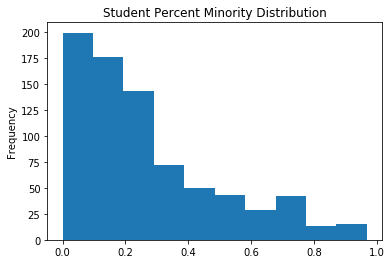

In [238]:
tot_2['Percent Minority'].plot(kind='hist')
plt.title('Student Percent Minority Distribution')

Text(0.5,1,'Teacher Percent Minority Distribution')

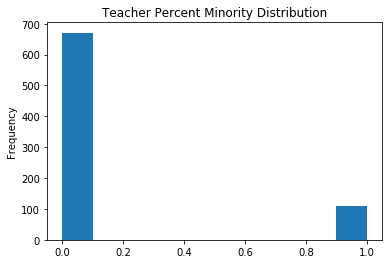

In [239]:
tot_2['Teacher Minority'].plot(kind='hist')
plt.title('Teacher Percent Minority Distribution')